# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [ ]:
# Use this space for any additional import statements you need


In [2]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

# Two useful regex
whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# It's handy to have a full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# and now our functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters.
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity =   num_unique_tokens / num_tokens if num_tokens > 0 else 0 
    num_characters =   sum(len(token) for token in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])


    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # modify this function to remove stopwords
    return(tokens)

def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # modify this function to return tokens
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)


## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [28]:
## Data Ingestion

#Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [29]:
twitter_data_2 = pd.read_csv(twitter_folder + artist_files['robyn'],
                             sep="\t",
                             quoting=3)
twitter_data_2['artist'] = "robyn"

twitter_data = pd.concat([
    twitter_data,twitter_data_2])

del(twitter_data_2)

In [5]:
# read in the lyrics here
import pandas as pd
def load_lyrics(lyrics_folder):
    lyrics_data = {}

    for root, _, files in os.walk(lyrics_folder):
        for file in files:
            if file.endswith('.txt'):
                # Extract the artist and song title from the file name
                parts = file.split('_')
                if len(parts) < 2:
                    print(f"Skipping file due to unexpected name format: {file}")
                    continue  # skip files that don't meet the expected naming convention
                artist = parts[0] 
                song = '_'.join(parts[1:]).replace('.txt', '')
                # read the lyrics from the file
                # read the file name 
                file_path = os.path.join(root, file)
                with open(file_path, 'r', encoding='utf-8') as f:
                    lyrics = f.read()
                # initialize artist dictionary if not present
                if artist not in lyrics_data:
                    lyrics_data[artist] = {}

                # store lyrics
                lyrics_data[artist][song] = lyrics
                
    return lyrics_data   
# Function to convert lyrics dictionary to DataFrame

def lyrics_to_dataframe(lyrics_data):
    # Initialize an empty list to store the data 
    data = []  
    # Iterate through the artists
    for artist in lyrics_data:
        for song in lyrics_data[artist]:
            first_line = lyrics_data[artist][song].split('\n', 1)[0].strip()
            title = first_line if first_line else song 
            tokens = re.findall(r'\b\w+\b', title.lower())
            data.append({
                'artist': artist,
                'song': tokens,
                'lyrics': lyrics_data[artist][song]
            }) 
    # convert the list to a DataFrame
    df = pd.DataFrame(data)
    return df

# load the lyrics
lyrics_folder = "/Users/smsultanmahmudrahat/Downloads/department/text_minning_dep /week_2/M1_Results/lyrics"
lyrics_data = load_lyrics(lyrics_folder)

# convert the lyrics to a DataFrame
lyrics_data = lyrics_to_dataframe(lyrics_data)

## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [6]:
# apply the `pipeline` techniques from BTAP Ch 1 or 5

my_pipeline = [str.lower, remove_punctuation, tokenize, remove_stop]

lyrics_data["tokens"] = lyrics_data["lyrics"].apply(prepare,pipeline=my_pipeline)
lyrics_data["num_tokens"] = lyrics_data["tokens"].map(len) 

twitter_data["tokens"] = twitter_data["description"].apply(prepare,pipeline=my_pipeline)
twitter_data["num_tokens"] = twitter_data["tokens"].map(len) 


In [7]:
twitter_data['has_emoji'] = twitter_data["description"].apply(contains_emoji)

Let's take a quick look at some descriptions with emojis.

In [41]:

# Tokenize the descriptions
twitter_data['tokens'] = twitter_data['tokens'].str.split()

# Extract and flatten tokens for Robyn
robyn_tokens_exploded = twitter_data.loc[twitter_data['artist'] == 'robyn', 'tokens'].explode()
robyn_twitter_tokens = robyn_tokens_exploded.tolist()

# extract and flatten tokens for Cher
cher_tokens_exploded = twitter_data.loc[twitter_data['artist'] == 'cher', 'tokens'].explode()
cher_twitter_tokens = cher_tokens_exploded.tolist()

# Create DataFrames from the token lists
robyn_twitter_df = pd.DataFrame({'tokens': robyn_twitter_tokens})
cher_twitter_df = pd.DataFrame({'tokens': cher_twitter_tokens})


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: One way to improve how we break text into words, or tokenize, could focus on handling contractions, punctuation, and special characters better. For example, turning "don't" into "do" and "not" could provide a clearer understanding of the words being used. Also, recognizing when punctuation is part of a number or abbreviation, rather than the end of a sentence, could prevent mistakes. Lastly, dealing effectively with emojis and other special characters that are commonly used in casual writing could enhance our analysis, making it more accurate in capturing the true meaning and structure of the text. These improvements would make our data analysis more precise, particularly in how we count and interpret different elements of language.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [16]:
def descriptive_stats(tokens, verbose=True):
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0 
    num_characters = sum(len(token) for token in tokens)
    
    if verbose:        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
    return [num_tokens, num_unique_tokens, lexical_diversity, num_characters]

# Calculate statistics for Robyn's lyrics
robyn_stats = descriptive_stats(robyn_token)
print("Robyn's lyrics descriptive statistics:", robyn_stats)

# calculate statistics for Cher's lyrics
cher_stats = descriptive_stats(cher_token)
print("Cher's lyrics descriptive statistics:", cher_stats)

There are 29260 tokens in the data.
There are 2270 unique tokens in the data.
There are 112490 characters in the data.
The lexical diversity is 0.078 in the data.
Robyn's lyrics descriptive statistics: [29260, 2270, 0.07758031442241968, 112490]
There are 70037 tokens in the data.
There are 3826 unique tokens in the data.
There are 265003 characters in the data.
The lexical diversity is 0.055 in the data.
Cher's lyrics descriptive statistics: [70037, 3826, 0.05462826791553036, 265003]


In [17]:
print("Comparison of Descriptive Statistics for Robyn and Cher's Lyrics:")

comparison_df = pd.DataFrame({
    "Statistic": ["Number of Tokens", "Number of Unique Tokens", "Lexical Diversity", "Number of Characters"],
    "Robyn": robyn_stats,
    "Cher": cher_stats
})

print(comparison_df)

Comparison of Descriptive Statistics for Robyn and Cher's Lyrics:
                 Statistic         Robyn           Cher
0         Number of Tokens   29260.00000   70037.000000
1  Number of Unique Tokens    2270.00000    3826.000000
2        Lexical Diversity       0.07758       0.054628
3     Number of Characters  112490.00000  265003.000000


Q: what observations do you make about these data? 

A: The comparison of descriptive statistics for Robyn and Cher’s lyrics reveals notable differences in their lyrical styles. Cher’s lyrics contain a significantly higher number of tokens (70,037) and characters (265,003) compared to Robyn’s (29,260 tokens and 112,490 characters), indicating that Cher’s songs are more voluminous. However, Robyn’s lyrics exhibit higher lexical diversity (0.07758) than Cher’s (0.054628), despite having fewer unique tokens (2,270 vs. 3,826). This suggests that while Cher’s lyrics encompass a broader vocabulary, they tend to be more repetitive. In contrast, Robyn uses a more varied set of words within a smaller corpus, reflecting a different stylistic approach that emphasizes linguistic diversity over sheer volume. These observations point to Cher’s tendency towards more extensive and perhaps repetitive lyrics, while Robyn’s work is characterized by concise yet diverse language use.


## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [19]:
from collections import Counter

# count the occurrences of each token in Robyn's lyrics
robyn_token_counts = Counter(robyn_token)

# Count the occurrences of each token in Cher's lyrics
cher_token_counts = Counter(cher_token)

# Total number of tokens in each corpus
total_robyn_tokens = len(robyn_token)
total_cher_tokens = len(cher_token)

# calculate concentration of each token in Robyn's lyrics
robyn_concentrations = {token: count / total_robyn_tokens for token, count in robyn_token_counts.items()}

# calculate concentration of each token in Cher's lyrics
cher_concentrations = {token: count / total_cher_tokens for token, count in cher_token_counts.items()}

# minimum number of appearances for a token to be considered
n = 5

# Calculate concentration ratios
concentration_ratios = {}
for token in set(robyn_token).union(set(cher_token)):
    if robyn_token_counts.get(token, 0) >= n and cher_token_counts.get(token, 0) >= n:
        robyn_concentration = robyn_concentrations.get(token, 0)
        cher_concentration = cher_concentrations.get(token, 0)
        if cher_concentration > 0:
            concentration_ratios[token] = robyn_concentration / cher_concentration
        elif robyn_concentration > 0:
            concentration_ratios[token] = float('inf')  # Handle division by zero

# Invert the ratio for Cher's perspective
inverse_concentration_ratios = {token: 1 / ratio for token, ratio in concentration_ratios.items() if ratio != float('inf')}

# sort tokens by concentration ratio for Robyn
top_robyn_tokens = sorted(concentration_ratios, key=concentration_ratios.get, reverse=True)[:10]

# Sort tokens by concentration ratio for Cher (using inverted ratios)
top_cher_tokens = sorted(inverse_concentration_ratios, key=inverse_concentration_ratios.get, reverse=True)[:10]

# Print the results
print("Top 10 tokens uniquely related to Robyn's corpus:")
for token in top_robyn_tokens:
    print(f"{token}: {concentration_ratios[token]:.2f}")

print("\nTop 10 tokens uniquely related to Cher's corpus:")
for token in top_cher_tokens:
    print(f"{token}: {inverse_concentration_ratios[token]:.2f}")

Top 10 tokens uniquely related to Robyn's corpus:
beat: 20.56
dance: 14.36
yourself: 12.84
work: 12.13
hang: 11.37
forgive: 7.66
between: 7.18
alright: 7.18
shake: 7.18
party: 6.28

Top 10 tokens uniquely related to Cher's corpus:
walk: 9.86
find: 9.54
enough: 7.70
man: 7.42
without: 7.35
strong: 6.43
live: 5.68
believe: 5.51
tears: 4.76
name: 4.34


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: 

- Robyn’s focus on dance and self-reflection: The combination of words related to dancing and self-reflection is notable, suggesting a unique blend of energetic and introspective themes in her lyrics.
- Cher’s themes of resilience and emotion: Words like “strong,” “believe,” and “tears” point to a strong focus on emotional strength and personal empowerment, which are central themes in Cher’s music.
- Distinct lyrical styles: The top tokens highlight the distinct lyrical styles and thematic focuses of the two artists. Robyn’s lyrics emphasize movement and self-improvement, while Cher’s lyrics often explore emotional depth, relationships, and personal resilience.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 


In [ ]:
robyn_lyrics_df = pd.DataFrame({'tokens': robyn_token})
cher_lyrics_df = pd.DataFrame({'tokens': cher_token})
robyn_twitter_df = pd.DataFrame({'tokens': robyn_twitter_tokens})
cher_twitter_df = pd.DataFrame({'tokens': cher_twitter_tokens})

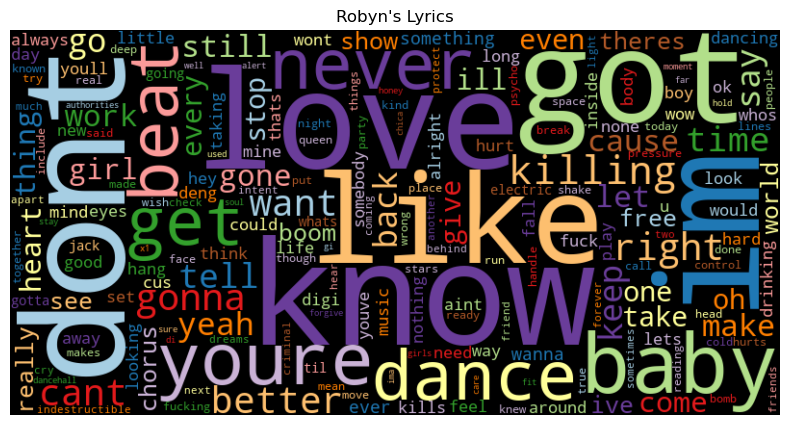

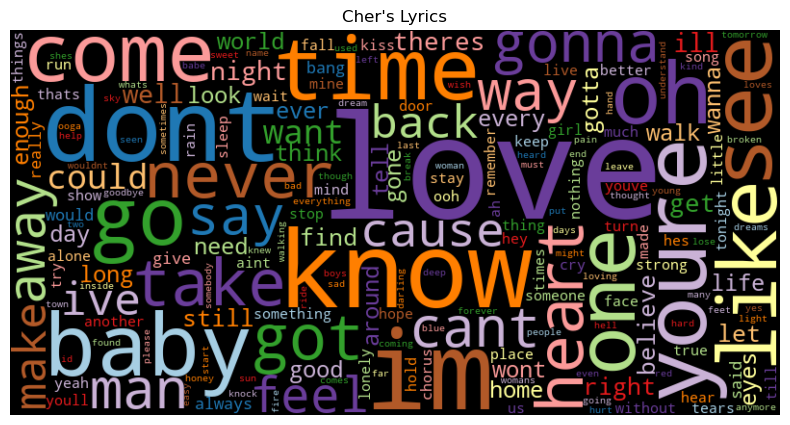

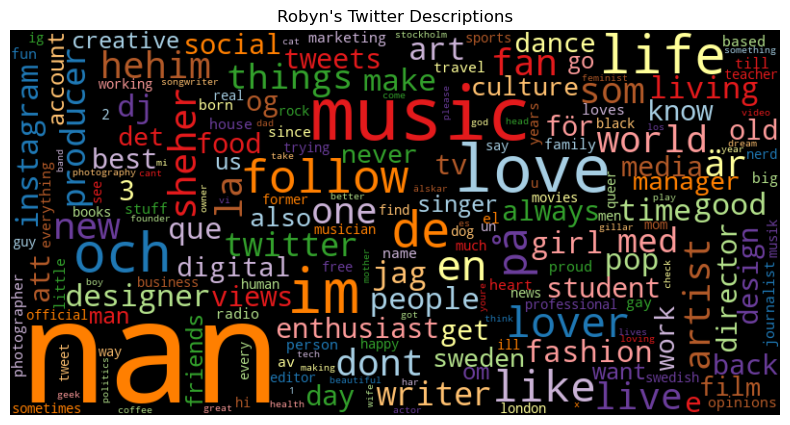

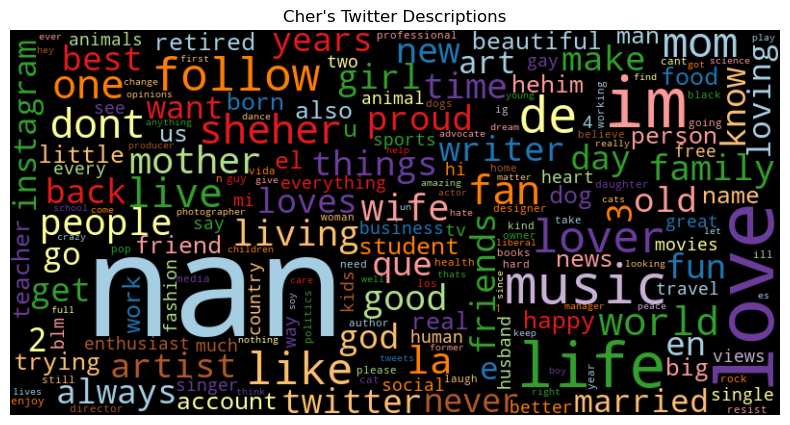

In [53]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Define the emoji pattern
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

# Define the preprocessing function
def preprocess_text(text):
    if not isinstance(text, str):
        text = str(text)
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove emojis
    text = emoji_pattern.sub(r'', text)
    return text

# Apply preprocessing to the token lists
robyn_tokens = [preprocess_text(token) for token in robyn_token]
cher_tokens = [preprocess_text(token) for token in cher_token]
robyn_twitter_tokens = [preprocess_text(token) for token in robyn_twitter_tokens]
cher_twitter_tokens = [preprocess_text(token) for token in cher_twitter_tokens]

# Convert the token lists to DataFrames
robyn_lyrics_df = pd.DataFrame({'tokens': robyn_tokens})
cher_lyrics_df = pd.DataFrame({'tokens': cher_tokens})
robyn_twitter_df = pd.DataFrame({'tokens': robyn_twitter_tokens})
cher_twitter_df = pd.DataFrame({'tokens': cher_twitter_tokens})

# Ensure the 'tokens' column does not contain any NaN values
robyn_lyrics_df['tokens'] = robyn_lyrics_df['tokens'].fillna('')
cher_lyrics_df['tokens'] = cher_lyrics_df['tokens'].fillna('')
robyn_twitter_df['tokens'] = robyn_twitter_df['tokens'].fillna('')
cher_twitter_df['tokens'] = cher_twitter_df['tokens'].fillna('')

# Count word frequencies
def count_words(df, column='tokens', preprocess=None, min_freq=2):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens.split())

    counter = Counter()
    df[column].map(update)
    
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

robyn_lyrics_freq = count_words(robyn_lyrics_df)
cher_lyrics_freq = count_words(cher_lyrics_df)
robyn_twitter_freq = count_words(robyn_twitter_df)
cher_twitter_freq = count_words(cher_twitter_df)

# Generate and display word clouds
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    wc = WordCloud(width=800, height=400, 
                   background_color="black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    if isinstance(word_freq, pd.Series):
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    if stopwords is not None:
        counter = {token: freq for (token, freq) in counter.items() if token not in stopwords}
    
    wc.generate_from_frequencies(counter)
    plt.figure(figsize=(10, 5))
    plt.title(title)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

wordcloud(robyn_lyrics_freq['freq'], title="Robyn's Lyrics")
wordcloud(cher_lyrics_freq['freq'], title="Cher's Lyrics")
wordcloud(robyn_twitter_freq['freq'], title="Robyn's Twitter Descriptions")
wordcloud(cher_twitter_freq['freq'], title="Cher's Twitter Descriptions")

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A:
Observations about the Word Clouds for Twitter Descriptions:

Both word clouds for Robyn’s and Cher’s lyrics show a strong presence of words related to love, relationships, and emotions. Words like “love,” “know,” “baby,” “time,” and “come” are prominent in both clouds, indicating common lyrical themes centered around personal experiences and emotions.Robyn’s lyrics seem to incorporate more words related to action and movement, which aligns with her dance-pop music style. Cher’s lyrics reflect a blend of emotional depth and storytelling, which aligns with her long career in pop music, including themes of resilience and personal strength.

Observations about the Word Clouds for Twitter Descriptions:

- Both word clouds include words in other languages, such as “de,” “la,” “en,” “och,” “jag,” and “que,” indicating a diverse, multicultural fan base.
- Robyn’s Twitter: Words like “creative,” “digital,” “designer,” “writer,” “fashion,” and “art” suggest a community of fans involved in creative and digital industries. 
- Robyn’s Twitter: Words like “mother,” “family,” “retired,” “proud,” and “wife” indicate a community that emphasizes family roles, personal achievements, and life stages.


